In [1]:
import pandas as pd

matches = pd.read_csv("matches_2classes.csv", index_col=0)
matches.head()

,date,result,gf,ga,opponent,xg,xga,poss,attendance,captain,...,dist,fk,pk,pkatt,team,venue_code,opp_code,hour,day_code,target
1,2023-08-12,W,2.0,1.0,Nott'ham Forest,0.8,1.2,78.0,59984.0,Martin Ødegaard,...,19.1,0.0,0,0,Arsenal,1,15,12.5,5,1
2,2023-08-21,W,1.0,0.0,Crystal Palace,2.0,1.0,53.0,24189.0,Martin Ødegaard,...,16.4,0.0,1,1,Arsenal,0,7,20.0,0,1
3,2023-08-26,D,2.0,2.0,Fulham,3.2,0.6,71.0,59961.0,Martin Ødegaard,...,13.8,0.0,1,1,Arsenal,1,9,15.0,5,0
4,2023-09-03,W,3.0,1.0,Manchester Utd,2.3,0.9,55.0,60192.0,Martin Ødegaard,...,15.0,0.0,0,0,Arsenal,1,13,16.5,6,1
5,2023-09-17,W,1.0,0.0,Everton,1.0,0.3,74.0,39217.0,Martin Ødegaard,...,17.4,0.0,0,0,Arsenal,0,8,16.5,6,1


In [2]:
predictors = ["venue_code", "opp_code", "hour", "day_code"]

train = matches[matches["date"] < '2024-01-01']
test = matches[matches["date"] > '2024-01-01']

In [3]:
train.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,venue_code,opp_code,hour,day_code,target
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.556122,1.556122,1.506122,1.506122,50.000000,38291.897959,13.165816,4.418367,16.740306,0.359694,0.130102,0.142857,0.500000,9.505102,15.854592,4.704082,0.408163
std,1.276149,1.276149,0.838226,0.838226,13.819627,17727.024935,5.622894,2.519178,3.022492,0.559236,0.358901,0.371628,0.500639,5.781616,2.270804,1.511823,0.492122
min,0.000000,0.000000,0.000000,0.000000,20.000000,10290.000000,2.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000
25%,1.000000,1.000000,0.900000,0.900000,39.000000,24444.750000,9.000000,3.000000,14.900000,0.000000,0.000000,0.000000,0.000000,5.000000,14.000000,5.000000,0.000000
50%,1.000000,1.000000,1.300000,1.300000,50.000000,31812.000000,12.000000,4.000000,16.700000,0.000000,0.000000,0.000000,0.500000,9.000000,15.000000,5.000000,0.000000
75%,2.000000,2.000000,2.100000,2.100000,61.000000,53117.250000,16.000000,6.000000,18.325000,1.000000,0.000000,0.000000,1.000000,15.000000,17.500000,6.000000,1.000000
max,8.000000,8.000000,4.100000,4.100000,80.000000,73607.000000,34.000000,15.000000,39.900000,2.000000,2.000000,2.000000,1.000000,19.000000,20.250000,6.000000,1.000000


In [4]:
test.describe()

,gf,ga,xg,xga,poss,attendance,sh,sot,dist,fk,pk,pkatt,venue_code,opp_code,hour,day_code,target
count,320.00000,320.00000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000,320.000000
mean,1.71875,1.71875,1.568437,1.568437,50.000000,38533.543750,14.156250,4.893750,16.753750,0.384375,0.128125,0.143750,0.500000,9.450000,16.425000,4.318750,0.362500
std,1.40162,1.40162,0.892377,0.892377,13.884205,18081.797256,6.335992,2.716712,2.640625,0.627784,0.370321,0.385422,0.500783,5.794603,2.474605,1.824157,0.481475
min,0.00000,0.00000,0.100000,0.100000,18.000000,10994.000000,2.000000,0.000000,8.400000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000,0.000000,0.000000
25%,1.00000,1.00000,0.900000,0.900000,40.000000,24417.000000,9.000000,3.000000,14.900000,0.000000,0.000000,0.000000,0.000000,4.000000,15.000000,3.750000,0.000000
50%,1.00000,1.00000,1.400000,1.400000,50.000000,38193.000000,13.000000,5.000000,16.750000,0.000000,0.000000,0.000000,0.500000,9.000000,15.000000,5.000000,0.000000
75%,3.00000,3.00000,2.100000,2.100000,60.000000,53445.000000,18.000000,6.000000,18.500000,1.000000,0.000000,0.000000,1.000000,14.250000,19.500000,5.000000,1.000000
max,6.00000,6.00000,4.200000,4.200000,82.000000,73612.000000,36.000000,15.000000,25.400000,3.000000,2.000000,2.000000,1.000000,19.000000,20.250000,6.000000,1.000000


In [5]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import (confusion_matrix,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             f1_score,
                            )

svc = LinearSVC(multi_class = 'ovr',
                C = 1/120,
                dual = True)

svc = SVC(C=1, 
          gamma=10, 
          kernel='rbf')
#svc = SVC(degree = 2,
#         )

svc.fit(train[predictors], train['target'])

SVC(C=1, gamma=10)

In [6]:
preds = svc.predict(test[predictors])

In [7]:
conf_matrix = confusion_matrix(test["target"], preds)
accuracy = accuracy_score(test["target"], preds)
precision = precision_score(test["target"], preds)
recall = recall_score(test["target"], preds)
f1score = f1_score(test["target"], preds)

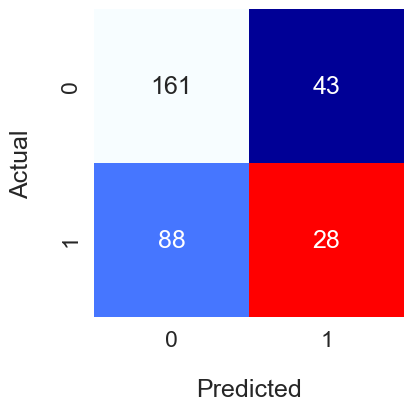

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
 
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
 
ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [9]:
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.590625
Precision = 0.39436619718309857
Recall = 0.2413793103448276
F1 Score = 0.2994652406417112


In [10]:
from sklearn import preprocessing
matches[predictors] = preprocessing.scale(matches[predictors]) 

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']
             } 

baseline_svm = SVC()

grid_search = GridSearchCV(estimator=baseline_svm, param_grid=param_grid, cv=5)
grid_search.fit(train[predictors], train['target'])

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
preds_best = best_model.predict(test[predictors])
accuracy_best = accuracy_score(test['target'], preds_best)
print(f"Best SVM Accuracy: {accuracy_best:.2f}")
print(f"Best Hyperparameters: {best_params}")

Best SVM Accuracy: 0.59
Best Hyperparameters: {'C': 1, 'gamma': 10, 'kernel': 'rbf'}


In [12]:
combined = pd.DataFrame(dict(actual=test['target'], predicted=preds))

In [13]:
matches_rolling = pd.read_csv("matches_2classes_rolling.csv", index_col=0)

cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols = [f"{c}_rolling" for c in cols]

In [14]:
svc = SVC(C=100, 
          gamma=0.001, 
          kernel='rbf')

In [15]:
def make_predictions(data, predictors):
    train = data[data["date"] < '2024-01-01']
    test = data[data["date"] > '2024-01-01']
    svc.fit(train[predictors], train["target"])
    preds = svc.predict(test[predictors])
    combined = pd.DataFrame(dict(actual=test["target"], predicted=preds), index=test.index)
    preds = svc.predict(test[predictors])
    return combined, preds

combined, preds = make_predictions(matches_rolling, predictors + new_cols)

In [16]:
param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear', 'rbf']
             } 
matches_rolling[predictors + new_cols] = preprocessing.scale(matches_rolling[predictors + new_cols]) 
train = matches_rolling[matches_rolling["date"] < '2024-01-01']
test = matches_rolling[matches_rolling["date"] > '2024-01-01']

baseline_svm = SVC()

grid_search = GridSearchCV(estimator=baseline_svm, param_grid=param_grid, cv=5)
grid_search.fit(train[predictors + new_cols], train['target'])

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model
preds_best = best_model.predict(test[predictors + new_cols])
accuracy_best = accuracy_score(test['target'], preds_best)
print(f"Best SVM Accuracy: {accuracy_best:.2f}")
print(f"Best Hyperparameters: {best_params}")

Best SVM Accuracy: 0.70
Best Hyperparameters: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


In [17]:
conf_matrix = confusion_matrix(test["target"], preds)
accuracy = accuracy_score(test["target"], preds)
precision = precision_score(test["target"], preds)
recall = recall_score(test["target"], preds)
f1score = f1_score(test["target"], preds)

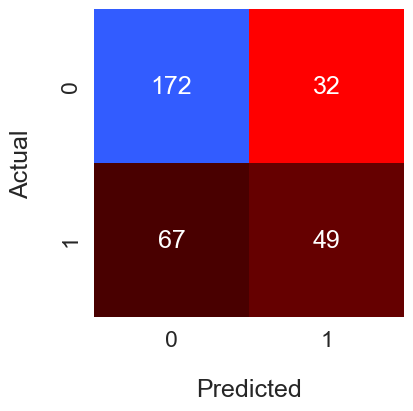

In [18]:
plt.figure(figsize=(4,4))
sns.set(font_scale = 1.5)
 
ax = sns.heatmap(
    conf_matrix, # confusion matrix 2D array 
    annot=True, # show numbers in the cells
    fmt='d', # show numbers as integers
    cbar=False, # don't show the color bar
    cmap='flag', # customize color map
    vmax=175 # to get better color contrast
)
 
ax.set_xlabel("Predicted", labelpad=20)
ax.set_ylabel("Actual", labelpad=20)
plt.show()

In [19]:
print(f"Accuracy = {accuracy}")
print(f"Precision = {precision}")
print(f"Recall = {recall}")
print(f"F1 Score = {f1score}")

Accuracy = 0.690625
Precision = 0.6049382716049383
Recall = 0.4224137931034483
F1 Score = 0.4974619289340101


In [20]:
combined.head(20)

,actual,predicted
19,1,1
20,1,1
21,1,1
22,1,0
23,1,1
24,1,1
25,1,1
26,1,1
27,0,1
28,1,1


In [21]:
combined = combined.merge(matches_rolling[["date", "team", "opponent", "result"]], left_index=True, right_index=True)

In [22]:
combined

,actual,predicted,date,team,opponent,result
19,1,1,2024-01-20,Arsenal,Crystal Palace,W
20,1,1,2024-01-30,Arsenal,Nott'ham Forest,W
21,1,1,2024-02-04,Arsenal,Liverpool,W
22,1,0,2024-02-11,Arsenal,West Ham,W
23,1,1,2024-02-17,Arsenal,Burnley,W
...,...,...,...,...,...,...
689,0,0,2024-04-13,Wolves,Nott'ham Forest,D
690,0,0,2024-04-20,Wolves,Arsenal,L
691,0,0,2024-04-24,Wolves,Bournemouth,L
692,1,0,2024-04-27,Wolves,Luton Town,W


In [23]:
merged = combined.merge(combined, left_on = ["date", "team"], right_on = ["date", "opponent"])

merged

,actual_x,predicted_x,date,team_x,opponent_x,result_x,actual_y,predicted_y,team_y,opponent_y,result_y
0,1,1,2024-01-20,Arsenal,Crystal Palace,W,0,0,Crystal Palace,Arsenal,L
1,1,1,2024-01-30,Arsenal,Nott'ham Forest,W,0,0,Nott'ham Forest,Arsenal,L
2,1,1,2024-02-04,Arsenal,Liverpool,W,0,0,Liverpool,Arsenal,L
3,1,0,2024-02-11,Arsenal,West Ham,W,0,0,West Ham,Arsenal,L
4,1,1,2024-02-17,Arsenal,Burnley,W,0,0,Burnley,Arsenal,L
...,...,...,...,...,...,...,...,...,...,...,...
315,0,0,2024-04-13,Wolves,Nott'ham Forest,D,0,0,Nott'ham Forest,Wolves,D
316,0,0,2024-04-20,Wolves,Arsenal,L,1,0,Arsenal,Wolves,W
317,0,0,2024-04-24,Wolves,Bournemouth,L,1,0,Bournemouth,Wolves,W
318,1,0,2024-04-27,Wolves,Luton Town,W,0,0,Luton Town,Wolves,L


In [24]:
merged[(merged["predicted_x"] == 0) & (merged["predicted_y"] == 0)]["actual_x"].value_counts()

0    115
1     57
Name: actual_x, dtype: int64

In [25]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] == 0)]["actual_x"].value_counts()

1    44
0    23
Name: actual_x, dtype: int64

In [26]:
merged[(merged["predicted_x"] == 0) & (merged["predicted_y"] == 1)]["actual_x"].value_counts()

0    57
1    10
Name: actual_x, dtype: int64

In [27]:
merged[(merged["predicted_x"] == 1) & (merged["predicted_y"] == 1)]["actual_x"].value_counts()

0    9
1    5
Name: actual_x, dtype: int64